In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [45]:
# Нужно ввести интересующий номер рыбы
indexes_fish = 650

In [4]:
df_catch = pd.read_csv("db1/catch.csv")

C:\Users\vv-sh\AppData\Local\Temp/ipykernel_6548/3670287965.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_catch = pd.read_csv("db1/catch.csv")


In [5]:
# id_ves - номер судна
# date - дата
# id_region - номер региона
# id_fish - номер рыбы
# catch_volume - тоннаж
# id_regime - цель добычи
# permit - номер разрешения
# id_own - номер собтсенника

In [6]:
df_catch

,id_ves,date,id_region,id_fish,catch_volume,id_regime,permit,id_own
0,1628,2022-01-01,272,400,31.874,41,2824,961
1,70,2022-01-01,277,886,0.476,1,2414,1281
2,1608,2022-01-01,116,409,26.31,15,3031,1227
3,832,2022-01-01,272,292,9.541,1,1894,1281
4,832,2022-01-01,272,113,0.062,1,1894,1281
...,...,...,...,...,...,...,...,...
115819,1339,2022-05-26,521,6,"25,054",18,1831,953
115820,417,2022-05-26,521,229,"13,47",18,9520826,9520680
115821,62,2022-05-26,521,229,"1,507",18,2568,1253
115822,865,2022-05-26,521,6,"21,437",18,2457,1145


In [7]:
for i in range(len(df_catch)):
    if type(df_catch.iloc[i, 4]) == str:
        df_catch.iloc[i, 4] = float(df_catch.iloc[i, 4].replace(",","."))
    else:
        continue

In [8]:
df_product = pd.read_csv("db1/product.csv")

C:\Users\vv-sh\AppData\Local\Temp/ipykernel_6548/3217028253.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_product = pd.read_csv("db1/product.csv")


In [9]:
# id_ves - номер судна
# date - дата
# id_prod_designate - что за продукция
# id_prod_type - что за продукция
# prod_volume - вес проодукции (в тоннах)
# prod_board_volume - сумма хранения на борту продукции

In [10]:
df_product

,id_ves,date,id_prod_designate,id_prod_type,prod_volume,prod_board_volume
0,1610,2022-01-01,1,10128,0.102,8.234
1,757,2022-01-01,3,3901,0.0,42.78
2,564,2022-01-01,1,1113,0.0,0.05
3,564,2022-01-01,1,1135,0.0,4.3
4,564,2022-01-01,1,4648,0.0,0.225
...,...,...,...,...,...,...
523745,417,2022-05-26,1,9991,"13,47",0
523746,62,2022-05-26,1,9660,"1,485","17,259"
523747,865,2022-05-26,1,9660,"21,12","181,39"
523748,865,2022-05-26,1,9661,0,"9,02"


In [11]:
df_fish = pd.read_csv("db1/ref/fish.csv", delimiter = ";")

In [12]:
df_fish

,id_fish,fish
0,0,Не определен
1,1,макруронус
2,2,Рыбы и морепродукты
3,3,Рыбы
4,4,сельди
...,...,...
817,443,лещи морские серебристые
818,172,"скат колючий, лисица морская"
819,174,скаты песчаные
820,494,керчаки


In [13]:
df_prod_designate = pd.read_csv("db1/ref/prod_designate.csv", delimiter = ";")

In [14]:
df_prod_designate

,id_prod_designate,prod_designate
0,0,не определен
1,1,"рыбопродукция, выпущенная из собственного сырь..."
2,3,"рыбопродукция, принятая для транспортировки"
3,4,"рыбопродукция, принятая (купленная) для промпе..."
4,5,"рыбопродукция из собств сырья, предназн для пр..."
5,8,"промпереработанная рыбопродукция,выпущ ранее и..."
6,2,"рыбопродукция, выпущенная из сырья,полученного..."


In [15]:
df_prod_type = pd.read_csv("db1/ref/prod_type.csv", delimiter = ";")

In [16]:
df_prod_type

,id_prod_type,prod_type,id_fish,prod_type_full
0,6060,Рыба охлажденная,2,рыба охлажденная
1,9420,альгинат натрия,29,альгинат натрия
2,6010,Пряный посол и маринады,2,пряный посол и маринады
3,6490,икра прочих рыб,2,икра прочих рыб
4,8302,"Рыба, морепродукты и отходы от разделки рыбы д...",2,рыба морепродукты и отходы от разделки рыбы дл...
...,...,...,...,...
10188,9712,краб-стр опил компл конеч в панц вар-мор гр L,294,краб-стригун опилио комплект конечностей в пан...
10189,9713,краб-стр опил компл конеч в панц вар-мор гр 2L,294,краб-стригун опилио комплект конечностей в пан...
10190,9714,краб-стр опил компл конеч в панц вар-мор гр 3L,294,краб-стригун опилио комплект конечностей в пан...
10191,9715,краб-стр опил компл конеч в панц вар-мор гр 4L,294,краб-стригун опилио комплект конечностей в пан...


In [17]:
df_regime = pd.read_csv("db1/ref/regime.csv", delimiter = ";")

In [18]:
df_regime

,id_regime,regime
0,0,не определен
1,1,промышленный лов
2,3,научные исследования
3,12,прибрежное рыболовство
4,15,промысел для РФ по международным договорам
5,18,"добыча (вылов) ВБР, ОДУ которых не установлен"
6,22,промысел в ИЭЗ РФ для ин.гос.(по междунар.дого...
7,41,на инвестиционные цели (пром)
8,61,добыча (вылов) крабов в инвест. целях (пром)
9,97,разрешенный прилов


In [19]:
df_region = pd.read_csv("db1/ref/region.csv", delimiter = ";")

In [20]:
df_region

,id_region,region
0,7010,Бирма
1,7009,Бенин
2,7008,Бельгия
3,7007,Барбадос
4,7006,Бангладеш
...,...,...
3325,9005,Район Регулирования Смешанной Российско-Норвеж...
3326,539,Чжанцзяган/Китай (КНР)/
3327,3345,Лиинахамари/СБ/
3328,549,Черное море восточнее меридиана 36°35'00' в.д.


In [21]:
df_Ext = pd.read_csv("db2/Ext.csv")

In [22]:
# id_fishery - номер судна
# id_own - номер собственника
# date_fishery - дата вылова
# id_Plat - номер завода
# id_vsd - ключ (отчет)
df_Ext

,id_ves,id_own,date_fishery,numPart,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat
0,1657,1175,2022-05-24 00:00:00,\N,6292428,8660287,\N,\N,\N
1,1529,1011,2022-05-24 00:00:00,\N,6296383,8502778,\N,\N,\N
2,1442,1236,2022-05-24 00:00:00,\N,6291814,9345405,\N,\N,\N
3,1442,1236,2022-05-24 00:00:00,\N,6291814,9288320,\N,\N,\N
4,1458,1175,2022-05-24 00:00:00,\N,6289122,7222858,\N,\N,\N
...,...,...,...,...,...,...,...,...,...
3260793,1292,964,2020-12-30 00:00:00,\N,6293229,8158628,\N,\N,\N
3260794,1441,961,2020-12-29 00:00:00,\N,6294151,8850190,\N,\N,\N
3260795,1441,961,2020-12-29 00:00:00,\N,6294151,7153677,\N,\N,\N
3260796,1441,961,2020-12-29 00:00:00,\N,6294151,8232059,\N,\N,\N


In [23]:
df_Ext2 = pd.read_csv("db2/Ext2.csv")

In [24]:
# id_vsd - ключ (отчет)
# num_vsd - номер ключа (отчета)
# id_fish - номер рыбы (может не совпадать с таблицей выше)
# date_vsd - дата отчета
# volume - кол-во (в кг, но если что-то указано в столбце unit см. туда)
# unit - добавочный столбец
df_Ext2

,id_vsd,num_vsd,id_fish,fish,date_vsd,volume,unit
0,7820377,5278887,400,минтай,2022-01-01 00:39:56,75480,\N
1,9397385,4729853,400,минтай,2022-01-01 01:34:08,62586,\N
2,8666689,3907934,292,треска,2022-01-01 01:34:11,1155,\N
3,6371297,5389594,400,минтай,2022-01-01 01:34:05,111048,\N
4,7953288,5347700,88,окунь-клювач,2022-01-01 01:34:11,1844,\N
...,...,...,...,...,...,...,...
3115275,9062498,5831811,294,краб-стригун опилио,2022-05-25 12:54:52,774,\N
3115276,7873072,5667082,294,краб-стригун опилио,2022-05-25 12:57:18,5533,\N
3115277,7896804,5421544,292,треска,2022-05-25 12:19:02,8235,\N
3115278,9512980,4007171,408,пикша,2022-05-25 12:19:02,756,\N


In [25]:
new_df = df_Ext.merge(df_Ext2, on=["id_vsd"])

In [26]:
new_df

,id_ves,id_own,date_fishery,numPart,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat,num_vsd,id_fish,fish,date_vsd,volume,unit
0,1657,1175,2022-05-24 00:00:00,\N,6292428,8660287,\N,\N,\N,3697783,292,треска,2022-05-24 17:31:35,17522,\N
1,1529,1011,2022-05-24 00:00:00,\N,6296383,8502778,\N,\N,\N,3861215,400,минтай,2022-05-24 17:31:35,72665,\N
2,1442,1236,2022-05-24 00:00:00,\N,6291814,9345405,\N,\N,\N,6133864,292,треска,2022-05-24 20:40:39,5250,\N
3,1442,1236,2022-05-24 00:00:00,\N,6291814,9288320,\N,\N,\N,4613464,112,палтус белокорый,2022-05-24 20:40:38,243,\N
4,1458,1175,2022-05-24 00:00:00,\N,6289122,7222858,\N,\N,\N,3584168,292,треска,2022-05-24 22:43:36,18536,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205581,1607,1085,2021-12-31 00:00:00,\N,6295040,6354537,\N,\N,\N,4296352,292,треска,2022-01-01 15:26:58,15911,\N
3205582,1607,1085,2021-12-31 00:00:00,\N,6295040,7104112,\N,\N,\N,5010461,408,пикша,2022-01-01 15:26:58,10446,\N
3205583,1607,1085,2021-12-31 00:00:00,\N,6295040,8597328,\N,\N,\N,4012909,610,зубатка синяя,2022-01-01 15:26:59,1228,\N
3205584,1607,1085,2021-12-31 00:00:00,\N,6295040,9281210,\N,\N,\N,4302514,714,камбала-ерш,2022-01-01 15:26:59,188,\N


In [27]:
# Работа с номерами кораблей окончена

In [28]:
# Работа с разделением по столбцу unit

In [29]:
list_types = []
for iterator in range(len(df_Ext2)):
    if new_df.iloc[iterator, -1] == "кг":
        new_df.iloc[iterator, -2] = new_df.iloc[iterator, -2]/1000
        list_types.append(1)
    elif new_df.iloc[iterator, -1] == "тонна":
        list_types.append(2)
    else:
        new_df.iloc[iterator, -2] = new_df.iloc[iterator, -2]/1000
        list_types.append(0)

In [30]:
new_df

,id_ves,id_own,date_fishery,numPart,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat,num_vsd,id_fish,fish,date_vsd,volume,unit
0,1657,1175,2022-05-24 00:00:00,\N,6292428,8660287,\N,\N,\N,3697783,292,треска,2022-05-24 17:31:35,17.522,\N
1,1529,1011,2022-05-24 00:00:00,\N,6296383,8502778,\N,\N,\N,3861215,400,минтай,2022-05-24 17:31:35,72.665,\N
2,1442,1236,2022-05-24 00:00:00,\N,6291814,9345405,\N,\N,\N,6133864,292,треска,2022-05-24 20:40:39,5.250,\N
3,1442,1236,2022-05-24 00:00:00,\N,6291814,9288320,\N,\N,\N,4613464,112,палтус белокорый,2022-05-24 20:40:38,0.243,\N
4,1458,1175,2022-05-24 00:00:00,\N,6289122,7222858,\N,\N,\N,3584168,292,треска,2022-05-24 22:43:36,18.536,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205581,1607,1085,2021-12-31 00:00:00,\N,6295040,6354537,\N,\N,\N,4296352,292,треска,2022-01-01 15:26:58,15911.000,\N
3205582,1607,1085,2021-12-31 00:00:00,\N,6295040,7104112,\N,\N,\N,5010461,408,пикша,2022-01-01 15:26:58,10446.000,\N
3205583,1607,1085,2021-12-31 00:00:00,\N,6295040,8597328,\N,\N,\N,4012909,610,зубатка синяя,2022-01-01 15:26:59,1228.000,\N
3205584,1607,1085,2021-12-31 00:00:00,\N,6295040,9281210,\N,\N,\N,4302514,714,камбала-ерш,2022-01-01 15:26:59,188.000,\N


In [31]:
# new_df.to_csv("new_df.csv", sep = ";", index=False)

In [32]:
# new_df["types"] = list_types
# new_df_only_volume = new_df[new_df["types"] == 0]
# new_df_only_kg = new_df[new_df["types"] == 1]
# new_df_only_t = new_df[new_df["types"] == 2]

In [33]:
def ship_fishing_vessels(id_fish):
    
    print("--"*20)
    my_file.write("\n" +"--"*20)
    list_ships = df_catch[df_catch["id_fish"] == id_fish]["id_ves"].unique()
    print("Список судов, которые официально занимались выловом данной рыбы:\n", list_ships)
    my_file.write("\nСписок судов, которые официально занимались выловом данной рыбы:\n")
    my_file.write(str(list_ships))
    
    return list_ships

In [34]:
def plat_fishing_vessels(name_fish):
    
    print("--"*20)
    my_file.write("\n" +"--"*20)
    list_Plat = new_df[(new_df["id_fish"] == name_fish) & (new_df["id_ves"] == -1)]["id_Plat"].unique()
    print("Список заводов, которые занимались данной рыбой:\n", list_Plat)
    my_file.write("\nСписок заводов, которые занимались данной рыбой:\n")
    my_file.write(str(list_Plat))
    
    return list_Plat

In [35]:
def info_ship(ship, fish, name_fish):
    
    print("--"*20)
    my_file.write("\n" +"--"*20)
    own = df_catch[df_catch["id_ves"] == ship]["id_own"].unique()[0]
    print("Информация по судну номер {} собственника(ов) {}".format(ship, own))
    my_file.write("\nИнформация по судну номер {} собственника(ов) {}".format(ship, own))
    print("Вылов рыбы под номером {}, ({})".format(fish, name_fish))
    my_file.write("\nВылов рыбы под номером {}, ({})".format(fish, name_fish))
        
    
    summa_DB_1 = 0
    summa_DB_2 = 0
    for iterator in range(len(df_catch[(df_catch["id_ves"] == ship) & (df_catch["id_fish"] == fish)])):
        date_isp_DB_1 = df_catch[(df_catch["id_ves"] == ship) & (df_catch["id_fish"] == fish)]["date"].iloc[iterator]
        summa_DB_1 += df_catch[(df_catch["id_ves"] == ship) & (df_catch["date"] == date_isp_DB_1) & (df_catch["id_fish"] == fish)].iloc[0,4]
    summa_DB_1 = round(summa_DB_1, 3)
    print("По официальной информации из первой БД, судном {} было выловлено {} т рыбы под номером {}".format(ship,
                                                                                                             summa_DB_1,
                                                                                                             fish))
    
    my_file.write("\nПо официальной информации из первой БД, судном {} было выловлено {} т рыбы под номером {}".format(ship,
                                                                                                             summa_DB_1,
                                                                                                             fish))
    
    for iterator in range(len(new_df[(new_df["id_ves"] == ship)  & (new_df["id_fish"] == fish)])):
        date_isp_DB_2 = new_df[(new_df["id_ves"] == ship) & (new_df["id_fish"] == fish)]["date_fishery"].iloc[iterator]
        len_sr = len(new_df[(new_df["id_ves"] == ship) & (new_df["date_fishery"] == date_isp_DB_2) & (new_df["id_fish"] == fish)]["volume"])
        if len_sr > 1:
            summa_DB_2 += max(new_df[(new_df["id_ves"] == ship) & (new_df["date_fishery"] == date_isp_DB_2) & (new_df["id_fish"] == fish)]["volume"])/len_sr
        elif len_sr == 1:
            summa_DB_2 += new_df[(new_df["id_ves"] == ship) & (new_df["date_fishery"] == date_isp_DB_2) & (new_df["id_fish"] == fish)].iloc[0, -2]
    summa_DB_2 = round(summa_DB_2, 3)
    print("По информации из второй БД, судном {} за этот же период было выловлено {} т рыбы под номером {}".format(ship,
                                                                                                                    summa_DB_2,
                                                                                                                    fish))
    
    my_file.write("\nПо информации из второй БД, судном {} за этот же период было выловлено {} т рыбы под номером {}".format(ship,
                                                                                                                    summa_DB_2,
                                                                                                                    fish))
    
    if summa_DB_1 == summa_DB_2:
        print("По рыбе номер {} кол-во вылова по первой и второй БД совпадают и равны {} т".format(fish, summa_DB_1))
        my_file.write("\nПо рыбе номер {} кол-во вылова по первой и второй БД совпадают и равны {} т".format(fish, summa_DB_1))
        return 0
    elif summa_DB_1 > summa_DB_2:
        print("По рыбе номер {} кол-во вылова по первой и второй БД не совпадают. По первой БД вылов равен {} т, а по второй {} т".format(fish, summa_DB_1, summa_DB_2))
        my_file.write("\nПо рыбе номер {} кол-во вылова по первой и второй БД не совпадают. По первой БД вылов равен {} т, а по второй {} т".format(fish, summa_DB_1, summa_DB_2))
        print("*** Обнаружена аномаля в вылове рыбы! ***")
        my_file.write("\n*** Обнаружена аномаля в вылове рыбы! ***")
        return 1
    elif summa_DB_1 < summa_DB_2:
        print("По рыбе номер {} кол-во вылова по первой и второй БД не совпадают. По первой БД вылов равен {} т, а по второй {} т".format(fish, summa_DB_1, summa_DB_2))
        my_file.write("\nПо рыбе номер {} кол-во вылова по первой и второй БД не совпадают. По первой БД вылов равен {} т, а по второй {} т".format(fish, summa_DB_1, summa_DB_2))
        print("*** Обнаружена аномаля в вылове рыбы! ***")
        my_file.write("\n*** Обнаружена аномаля в вылове рыбы! ***")
        return 1

In [36]:
def info_Plat(plat, name_fish):
    print("--"*20)
    my_file.write("\n" +"--"*20)
    print("Информация по заводу номер {}".format(plat))
    my_file.write("\nИнформация по заводу номер {}".format(plat))
    print("Принята рыба {}".format(name_fish))
    my_file.write("\nПринята рыба {}".format(name_fish))
    sum_plat = sum(new_df[(new_df["fish"] == name_fish) & (new_df["id_ves"] == -1) & (new_df["id_Plat"] == plat)]["volume"])
    print("Заводом {}, принято {} т рыбы {}".format(plat, sum_plat, name_fish))
    my_file.write("\nЗаводом {}, принято {} т рыбы {}".format(plat, sum_plat, name_fish))
    
    return sum_plat

In [37]:
def print_info(id_fish):
    
    name_fish_in_function = df_fish[df_fish["id_fish"] == id_fish]["fish"].iloc[0]
    
    summ_oficial = sum(df_catch[df_catch["id_fish"] == id_fish]["catch_volume"])
    summ_oficial = round(summ_oficial, 3)
    
    summ_ship = sum(new_df[(new_df["fish"] == name_fish_in_function) & (new_df["id_ves"] != -1)]["volume"])
    summ_ship = round(summ_ship, 3)
    
    summ_plat = sum(new_df[(new_df["fish"] == name_fish_in_function) & (new_df["Name_Plat"] != -1) & (new_df["Name_Plat"] != "\\N")]["volume"])
    summ_plat = round(summ_plat, 3)
    
    print("--"*20)
    my_file.write("\n" +"--"*20)
    print("Официально, сумма выловленой рыбы {} за всё время составляет {} т".format(name_fish_in_function, summ_oficial))
    my_file.write("\nОфициально, сумма выловленой рыбы {} за всё время составляет {} т".format(name_fish_in_function, summ_oficial))
    print("Судя по отчетам, сумма выловленой рыбы {} за всё время составляет {} т".format(name_fish_in_function, summ_ship))
    my_file.write("\nСудя по отчетам, сумма выловленой рыбы {} за всё время составляет {} т".format(name_fish_in_function, summ_ship))
    print("Судя по отчетам, сумма полученной рыбы {} за всё время заводами составляет {} т".format(name_fish_in_function, summ_plat))
    my_file.write("\nСудя по отчетам, сумма полученной рыбы {} за всё время заводами составляет {} т".format(name_fish_in_function, summ_plat))
    return name_fish_in_function, summ_plat, summ_oficial, summ_ship

----------------------------------------
Официально, сумма выловленой рыбы тунцы за всё время составляет 9.063 т
Судя по отчетам, сумма выловленой рыбы тунцы за всё время составляет 9.063 т
Судя по отчетам, сумма полученной рыбы тунцы за всё время заводами составляет 9.063 т
----------------------------------------
Список судов, которые официально занимались выловом данной рыбы:
 [1448 1338]
----------------------------------------
Список заводов, которые занимались данной рыбой:
 [6294766 6296962]
----------------------------------------
Информация по судну номер 1448 собственника(ов) 1227
Вылов рыбы под номером 650, (тунцы)
По официальной информации из первой БД, судном 1448 было выловлено 5.913 т рыбы под номером 650
По информации из второй БД, судном 1448 за этот же период было выловлено 5.913 т рыбы под номером 650
По рыбе номер 650 кол-во вылова по первой и второй БД совпадают и равны 5.913 т
----------------------------------------
Информация по судну номер 1338 собственника(ов)

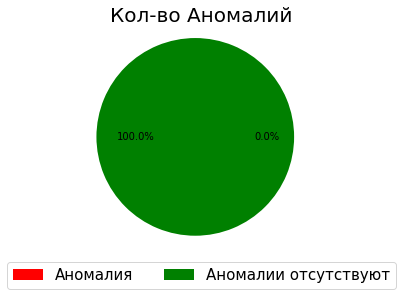

In [46]:
current_date = datetime.date.today()

current_date_time = datetime.datetime.now()
current_date_time = current_date_time.time()
current_date_time = str(current_date_time)[0:-7]
current_date_time = current_date_time.replace(":","-")

my_file = open("file_info_fish_number_" + str(indexes_fish) + "_" + str(current_date) + "_" + str(current_date_time) + ".txt", "w")

name_fish, summ_all_plat, summ_oficial, summ_ship = print_info(indexes_fish)

list_sfv = ship_fishing_vessels(indexes_fish)
list_pfv = plat_fishing_vessels(indexes_fish)

list_anomalies = []

for iterator_list_sfv in list_sfv:
    
    list_anomalies.append(info_ship(iterator_list_sfv, indexes_fish, name_fish))
    
    
summ_plat = 0
    
for iterator_list_pfv in list_pfv:
    
    sum_one_plat = info_Plat(iterator_list_pfv, name_fish)
    summ_plat += sum_one_plat
    
print("--"*20)
my_file.write("\n" +"--"*20)
if summ_oficial == summ_ship:
    print("Аномалии в вылове рыбы отсутсвуют")
    my_file.write("\nАномалии в вылове рыбы отсутсвуют")
    list_anomalies.append(0)
else:
    print("Обнаружена Аномалия в вылове рыбы!")
    my_file.write("\nОбнаружена Аномалия в вылове рыбы!")
    list_anomalies.append(1)
    
print("--"*20)
my_file.write("\n" +"--"*20)
if summ_all_plat == summ_plat:
    print("Аномалии в сбыте рыбы отсутсвуют")
    my_file.write("\nАномалии в сбыте рыбы отсутсвуют")
    list_anomalies.append(0)
else:
    print("Обнаружена Аномалия в сбыте рыбы!")
    my_file.write("\nОбнаружена Аномалия в сбыте рыбы!")
    list_anomalies.append(1)
    
element_count_0 = len([item for item in list_anomalies if item != 1])
element_count_1 = len([item for item in list_anomalies if item != 0])

print("--"*20)
my_file.write("\n" +"--"*20)
print("Кол-во найденных Аномалий: {}".format(element_count_1))
my_file.write("\nКол-во найденных Аномалий: {}".format(element_count_1))

labels = ['Аномалия','Аномалии отсутствуют']
values = [element_count_1, element_count_0]
explode = (0.2, 0)
colors = ['red','green']
plt.title('Кол-во Аномалий',fontsize=20)
plt.pie(values,colors=colors,explode=explode, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=2,fontsize=15)
plt.savefig("pie_chart_" + str(indexes_fish) + "_" + str(current_date) + "_" + str(current_date_time) + ".png")
plt.show()


my_file.close()